# Support Vector Machine(SVM)
-하이퍼 파라미터의 특징 살펴보기

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1)Data 

In [37]:
# sample data 생성
X,y = make_moons(n_samples=30, noise=0.2, random_state=1234)
print(X.shape)
print(y.shape)

(30, 2)
(30,)


In [66]:
z = {'x': X[:,0], 'y': X[:,1], 'label': y}
df = pd.DataFrame(z)
df.head()

,x,y,label
0,-0.051388,0.814918,0
1,-0.258767,0.329892,0
2,0.589309,1.072602,0
3,1.352354,-0.128771,0
4,1.618698,0.735524,1


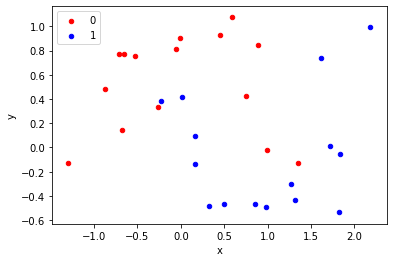

In [39]:

colors = { 0: "red", 1:"blue"}
fig, ax = plt.subplots()
grouped = df.groupby('label') #print: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000025D24DDDD88>

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]) 
    # group : label이 '0'인 df행  -->  group: label이 '1'인 df행 
    # key는 index 값
    


## 2)Model

In [40]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)

SVC()

## 3)Effect of hyperparameter

In [67]:
# Hyperparameter Boundary
cost = [0.1, 1, 10]  
gamma = [0.1, 1, 10]

fig, axs = plt.subplots(len(cost), len(gamma), figsize=(15, 10))

for i, c in enumerate(cost):
    for j, g in enumerate(gamma):
        clf = SVC(C=c, gamma=g )
        clf.fit(X, y)

        axs[i, j].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],facecolors='none' , zorder=11, edgecolors='k', s= 100) 
                                                                    # s = marker size , facecolors = 'none' --> 색을 빼고 테두리만 넣음
        axs[i, j].scatter(X[:,0], X[:,1], zorder=10, c=y, cmap=plt.cm.Blues, edgecolors='k')                                                                
        
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3 
        
        XX, YY = np.mgrid[x_min: x_max: 200j, y_min: y_max: 200j] # for문의 j가 아님
        Z = clf.decision_function( np.c_ [XX.ravel(), YY.ravel()])  # Z: (40000,) 
        Z = Z.reshape(XX.shape)  #(200, 200)

        axs[i, j].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Decision boundary
        axs[i, j].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])  
        axs[i, j].set_title(f'[cost: {c}, gamma: {g}]')
        plt.xlim(x_min, x_max) #그래프 범위 표시
        plt.ylim(y_min, y_max)
        plt.xticks(())  #그래프 눈금 표시
        plt.yticks(())

        
axs[-1, 1].set_xlabel('gamma')
axs[ 0, 0].set_ylabel('cost')
fig.suptitle('(cost, gamma)', fontsize=16)
plt.close(fig)

(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)


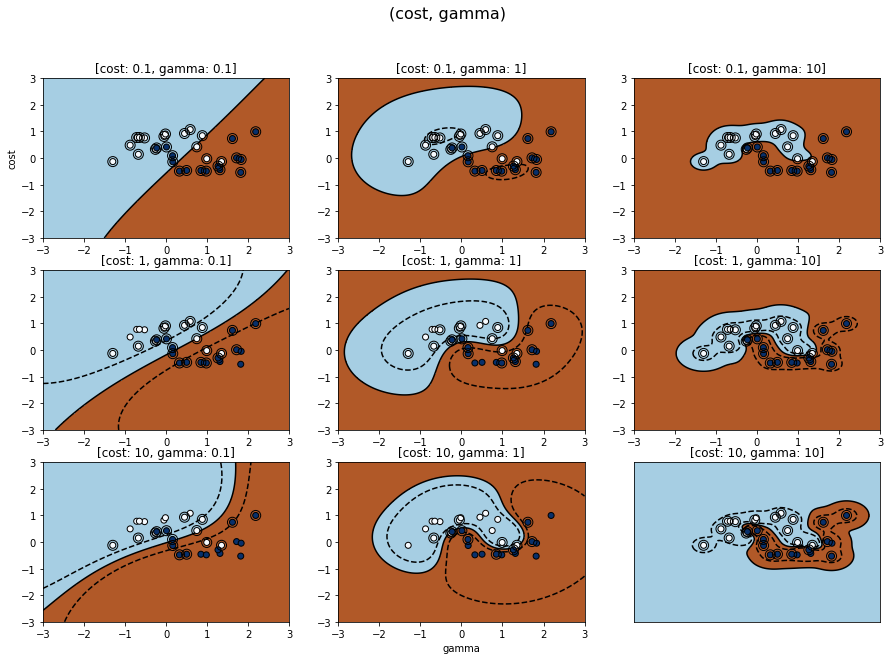

In [65]:
fig